 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
# Set file path to Whale Returns to retrieve data
wr_path = Path("../Starter_Code/Resources/whale_returns.csv")

# Open the Whale Returns and assign it wr_dataframe
wr_dataframe = pd.read_csv(wr_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
wr_dataframe = wr_dataframe.sort_index()

wr_dataframe.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
wr_dataframe.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [4]:
# Drop nulls
wr_dataframe = wr_dataframe.dropna()
wr_dataframe.shape

(1059, 4)

In [5]:
#Validate nulls have been dropped
wr_dataframe.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
# Set file path to Algorithmic Daily Returns to retrieve data
algo_path = Path("../Starter_Code/Resources/algo_returns.csv")

# Open the algorithmic returns and assign it algo_dataframe
algo_dataframe = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_dataframe = algo_dataframe.sort_index()
algo_dataframe.head()



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_dataframe.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [8]:
# Drop nulls
algo_dataframe = algo_dataframe.dropna()
algo_dataframe.shape

(1235, 2)

In [9]:
#Validate nulls have been dropped
algo_dataframe.isnull().sum()



Algo 1    0
Algo 2    0
dtype: int64

In [10]:
# Rename `Algo1` and 'Algo2' Columns to be specific to this portfolio.
algo_dataframe = algo_dataframe.rename(columns={
    "Algo 1": "Algo 1 Return",
    "Algo 2": "Algo 2 Return"
})

algo_dataframe.head()

,Algo 1 Return,Algo 2 Return
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices

# Set file path to S&P 500 Closing Prices to retrieve data
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")

# Open the S&P500 Closing Prices and assign it sp500_dataframe
sp500_dataframe = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_dataframe=sp500_dataframe.sort_index()

sp500_dataframe.head()



,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Check Data Types
sp500_dataframe.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types by removing $ and convert to float
sp500_dataframe['Close'] = sp500_dataframe['Close'].str.replace('$', '')
sp500_dataframe['Close'] = sp500_dataframe['Close'].astype(float)
sp500_dataframe.head()



c:\Users\Max Work\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [14]:
# Calculate Daily Returns
sp500_return = sp500_dataframe.pct_change()
sp500_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [15]:
# Drop nulls
sp500_dataframe = sp500_return.dropna()
sp500_dataframe.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_dataframe = sp500_dataframe.rename(columns={"Close": "SP500_Daily_Return"})
sp500_dataframe.head()


,SP500_Daily_Return
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

dfs = [wr_dataframe, algo_dataframe, sp500_dataframe]
#combo_dataframe = ft.reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)

combo_dataframe = pd.concat([wr_dataframe, algo_dataframe, sp500_dataframe],axis='columns', join= 'inner')

combo_dataframe.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1 Return,Algo 2 Return,SP500_Daily_Return
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

(2015.0, 2020.0)

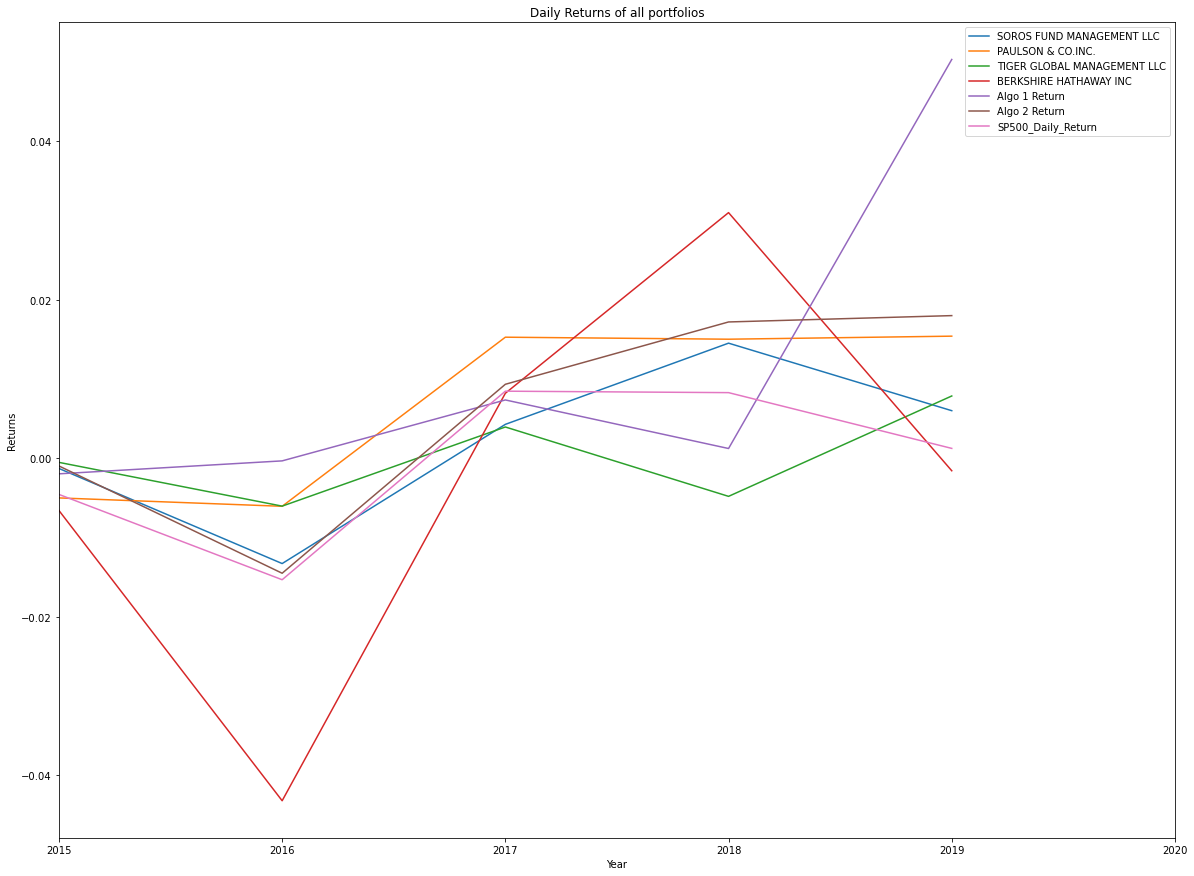

In [18]:
# Plot daily returns of all portfolios
daily_chart_yr = combo_dataframe.groupby([combo_dataframe.index.year]).first().plot(figsize=(20,15))
daily_chart_yr.set_xlabel("Year")
daily_chart_yr.set_ylabel("Returns")
daily_chart_yr.set_title('Daily Returns of all portfolios')
plt.xlim(2015, 2020)


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

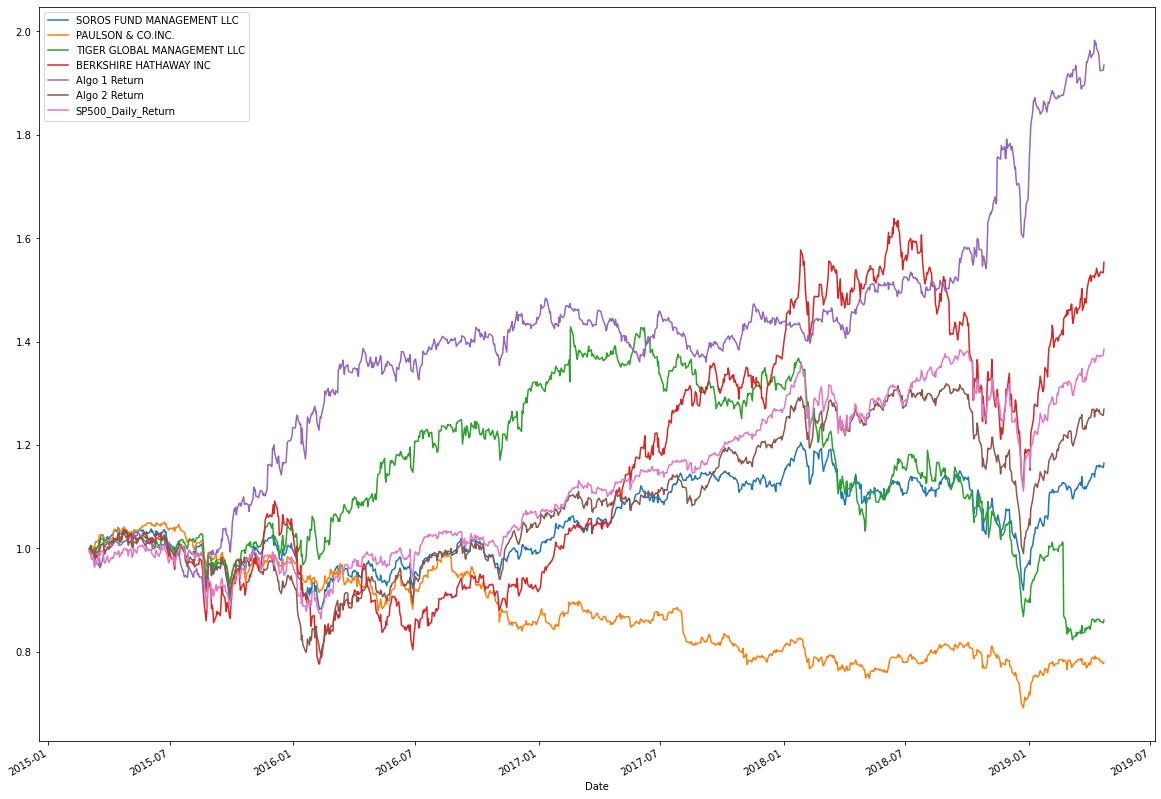

In [19]:
# Calculate cumulative returns of all portfolios

# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + combo_dataframe).cumprod()
cumulative_returns.head()


#Plot the cumulative returns
cumulative_returns.plot(figsize=(20,15))




---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

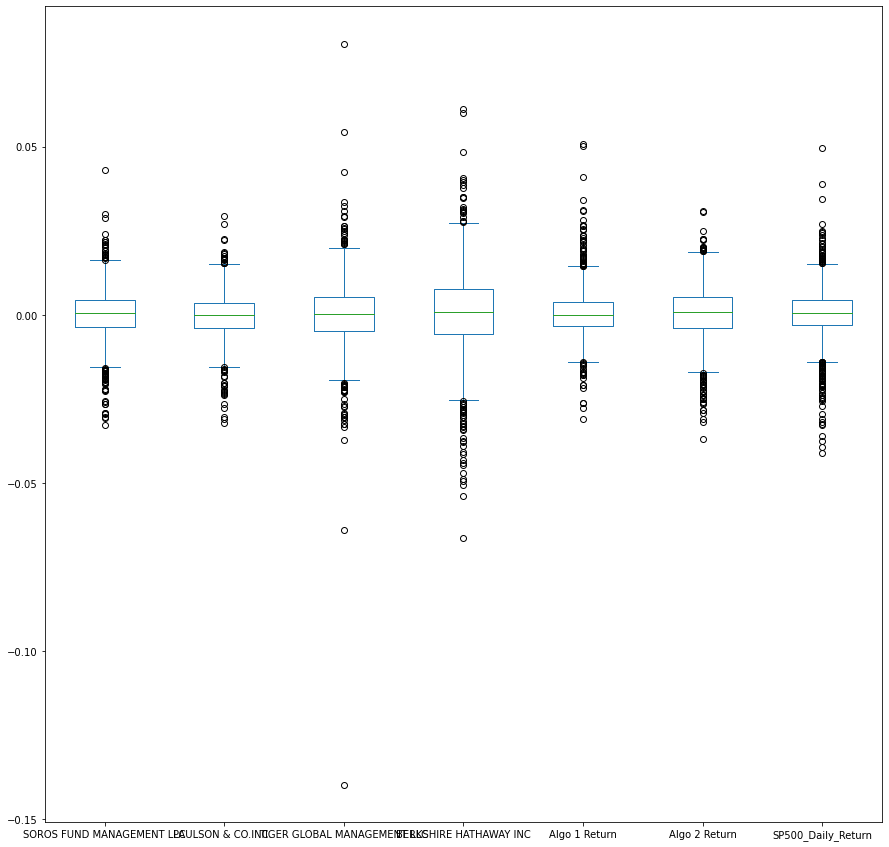

In [20]:
# Box plot to visually show risk
combo_dataframe.plot.box(figsize=(15,15))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = combo_dataframe.std()

# Display in decending order of standard deviations
print(daily_std.sort_values(ascending=False))


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500_Daily_Return             0.008554
Algo 2 Return                  0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1 Return                  0.007620
PAULSON & CO.INC.              0.007023
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = daily_std["SP500_Daily_Return"]

# Determine which portfolios are riskier than the S&P 500
sp500_std < daily_std



SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1 Return                  False
Algo 2 Return                  False
SP500_Daily_Return             False
dtype: bool

In [23]:
print("Tiger Global Management LLC and Berkshire Hathaway Inc are riskier than SP500.")

Tiger Global Management LLC and Berkshire Hathaway Inc are riskier than SP500.


### Calculate the Annualized Standard Deviation

In [24]:

# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
print(annualized_std)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1 Return                  0.120967
Algo 2 Return                  0.132430
SP500_Daily_Return             0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling STD for All Portfolios with 21 Window'}, xlabel='Date'>

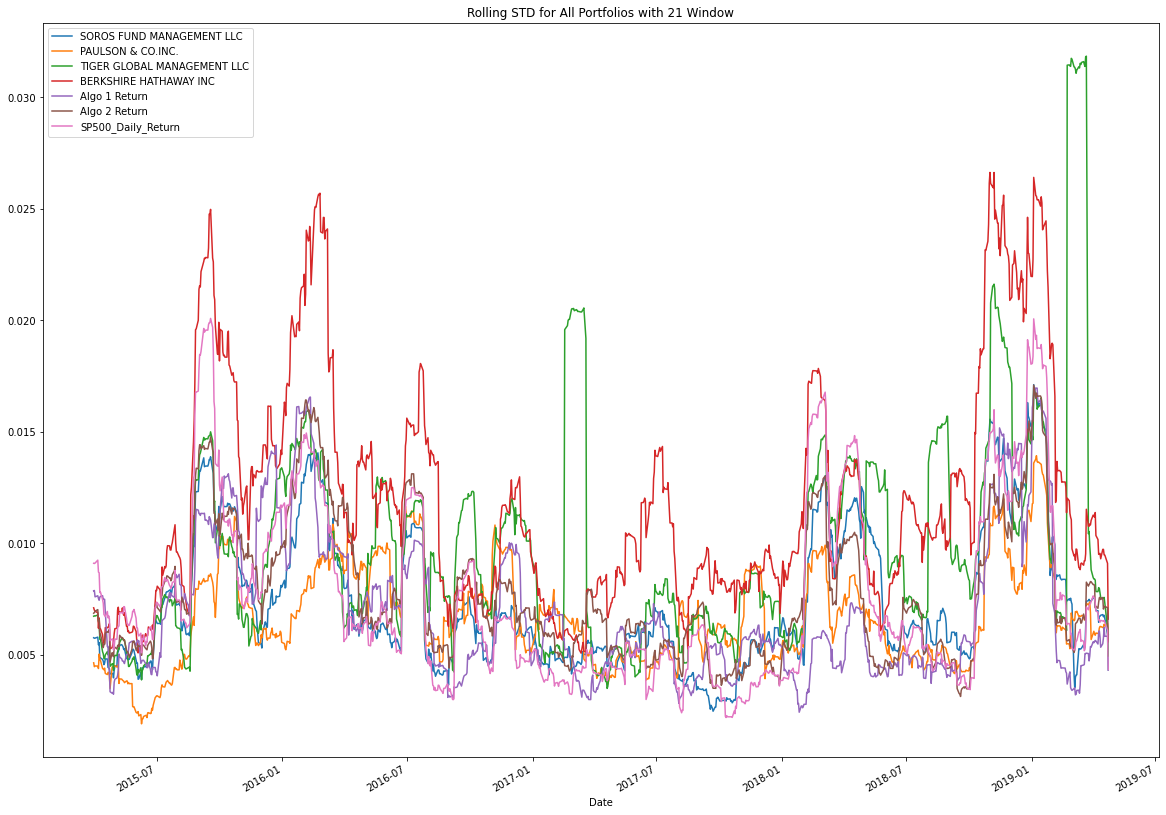

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combo_dataframe.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,15), title="Rolling STD for All Portfolios with 21 Window")


### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = combo_dataframe.corr()

# Display de correlation matrix
correlation

#sns.heatmap(correlation, vmin=-1, vmax=1.0)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1 Return,Algo 2 Return,SP500_Daily_Return
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1 Return,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2 Return,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500_Daily_Return,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

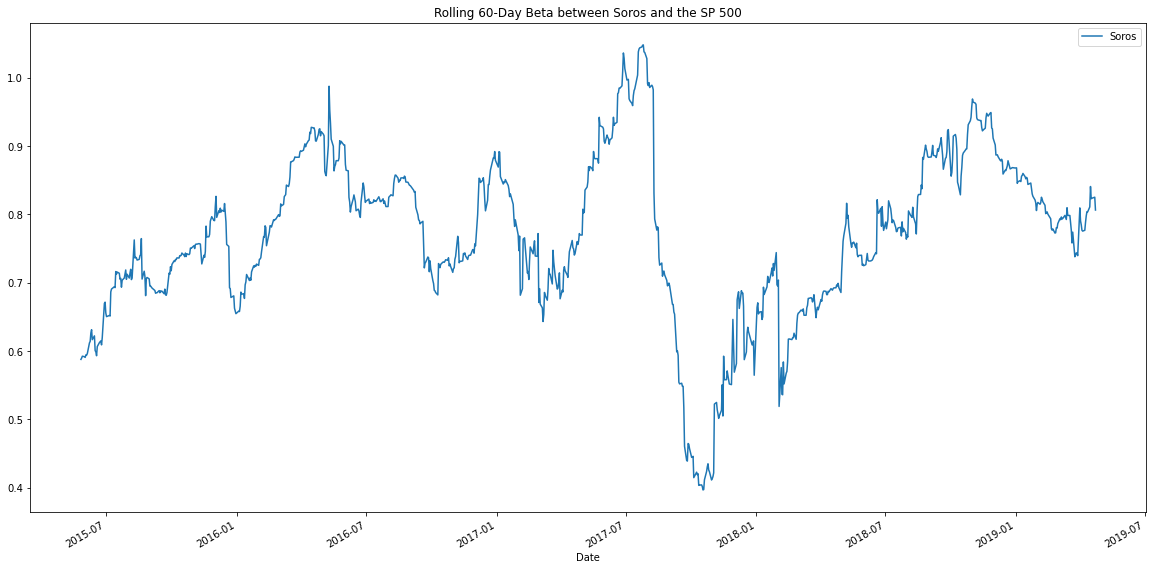

In [27]:
# Calculate covariance of a single portfolio
soros_covariance = combo_dataframe['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combo_dataframe['SP500_Daily_Return'])
paulson_covariance = combo_dataframe['PAULSON & CO.INC. '].rolling(window=60).cov(combo_dataframe['SP500_Daily_Return'])
tiger_covariance = combo_dataframe['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combo_dataframe['SP500_Daily_Return'])
berkshire_covariance = combo_dataframe['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combo_dataframe['SP500_Daily_Return'])
algo1_covariance = combo_dataframe['Algo 1 Return'].rolling(window=60).cov(combo_dataframe['SP500_Daily_Return'])
algo2_covariance = combo_dataframe['Algo 2 Return'].rolling(window=60).cov(combo_dataframe['SP500_Daily_Return'])


# Calculate variance of S&P 500
variance = combo_dataframe['SP500_Daily_Return'].rolling(window = 60).var()

# Computing beta
soros_beta = soros_covariance / variance
paulson_beta = paulson_covariance / variance
tiger_beta = tiger_covariance / variance
berkshire_beta = berkshire_covariance / variance
algo1_beta = algo1_covariance / variance
algo2_beta = algo2_covariance / variance
#print(f"Soros: {soros_beta} | Paulson: {paulson_beta} | Tiger: {tiger_beta}|Berkshire: {berkshire_beta}|Algo 1: {algo1_beta}|Algo 2: {algo2_beta}")


# Plot beta trend
ax = soros_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta between Soros and the SP 500')
#paulson_beta.plot(ax=ax)
#tiger_beta.plot(ax=ax)
#berkshire_beta.plot(ax=ax)
#algo1_beta.plot(ax=ax)
#algo2_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["Soros", "Paulson", "Tiger", "Berkshire", "Algo 1", "Algo 2"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Average with 21 Day'}, xlabel='Date'>

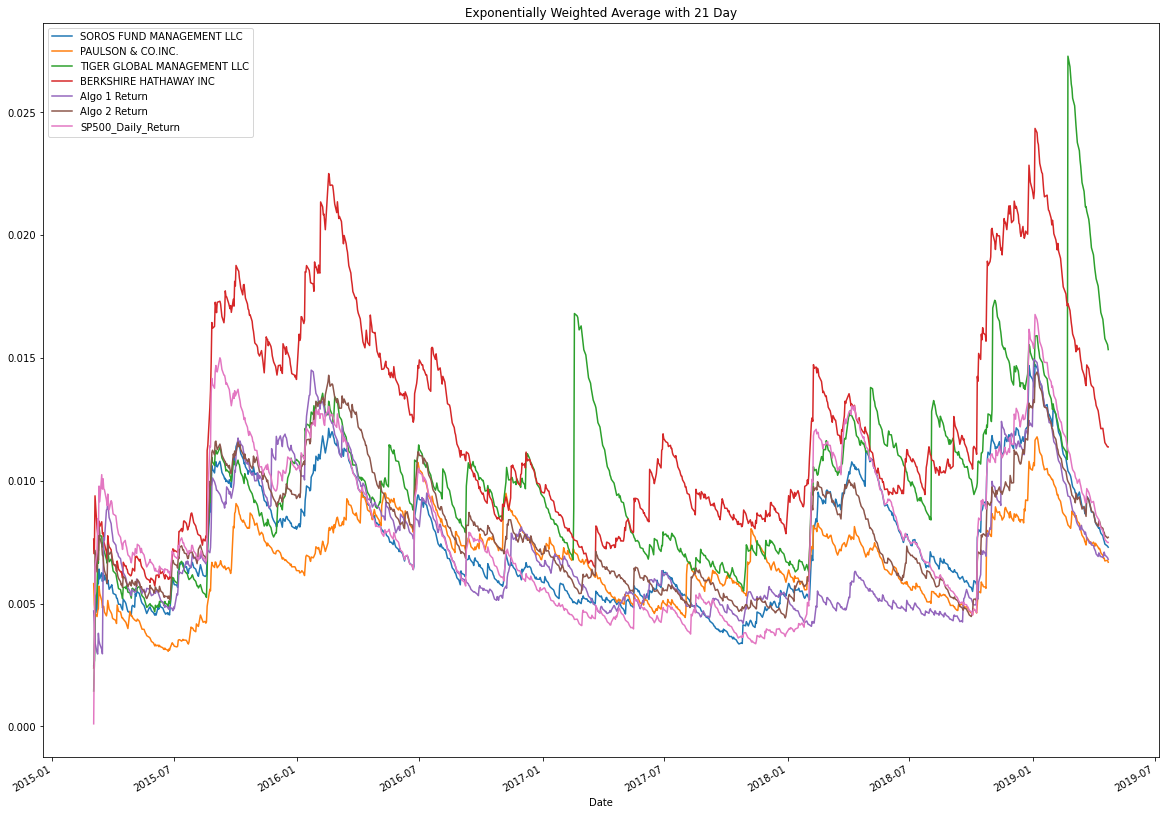

In [28]:
# Use `ewm` to calculate the rolling window
# DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, 
# min_periods=0, adjust=True, ignore_na=False, axis=0, times=None, method='single')

rolling_ewm = combo_dataframe.ewm(halflife=21).std().dropna().plot(figsize=(20,15), title="Exponentially Weighted Average with 21 Day")

rolling_ewm


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (combo_dataframe.mean() * 252) / (combo_dataframe.std() * np.sqrt(252))

sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1 Return                  1.378648
Algo 2 Return                  0.501364
SP500_Daily_Return             0.648267
dtype: float64

<AxesSubplot:>

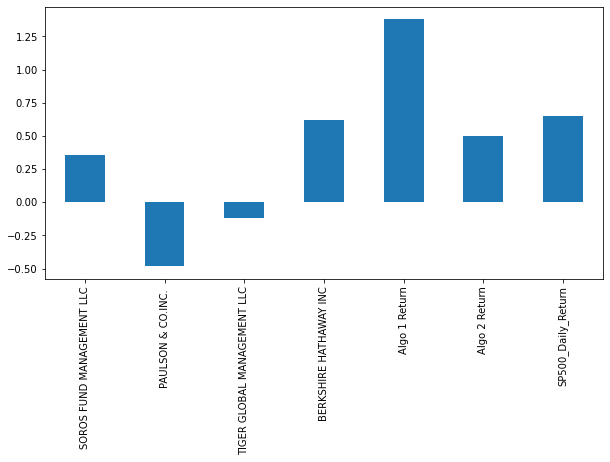

In [30]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(figsize=(10,5))



### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo1 outperformed Whales and S&P500 portfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock
# Set file path to AMC to retrieve data

amc_path = Path("../Starter_Code/Resources/amc.csv")

# Open the AMC file and assign it AMC_dataframe
amc_dataframe = pd.read_csv(amc_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
amc_dataframe = amc_dataframe.sort_index()

#Drop NA
amc_dataframe.dropna()

#Drop Columns
amc_dataframe.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)

#Change Close to Float
amc_dataframe['Close'] = amc_dataframe['Close'].astype(float)

#Rename Column
amc_dataframe.rename(columns= {'Close':'AMC Close'}, inplace = True)

amc_dataframe.head()


,AMC Close
Date,
2021-10-11,37.25
2021-10-12,36.82
2021-10-13,37.91
2021-10-14,40.07
2021-10-15,40.74


In [32]:
# Reading data from 2nd stock

# Set file path to NVVE to retrieve data
nvve_path = Path("../Starter_Code/Resources/nvve.csv")

# Open the Cost file and assign it cost_dataframe
nvve_dataframe = pd.read_csv(nvve_path, index_col="Date", infer_datetime_format=True,  parse_dates=True)
nvve_dataframe = nvve_dataframe.sort_index()

#Drop NA
nvve_dataframe.dropna()

#Drop Columns
nvve_dataframe.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)


#Change Close to Float
nvve_dataframe['Close'] = nvve_dataframe['Close'].astype(float)

#Rename Column
nvve_dataframe.rename(columns= {'Close':'NVVE Close'}, inplace = True)

nvve_dataframe.head()

,NVVE Close
Date,
2021-10-11,12.33
2021-10-12,12.28
2021-10-13,12.11
2021-10-14,12.17
2021-10-15,12.00


In [33]:
# Reading data from 3rd stock
# Set file path to oxy to retrieve data
oxy_path = Path("../Starter_Code/Resources/oxy.csv")

# Open the Oxy file and assign it oxy_dataframe
oxy_dataframe = pd.read_csv(oxy_path, index_col="Date", infer_datetime_format=True, parse_dates=True )
oxy_dataframe = oxy_dataframe.sort_index()

#Drop NA
oxy_dataframe.dropna()

#Drop Columns
oxy_dataframe.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)

#Change Close to Float
oxy_dataframe['Close'] = oxy_dataframe['Close'].astype(float)

#Rename Column
oxy_dataframe.rename(columns= {'Close':'OXY Close'}, inplace = True)
oxy_dataframe.head()

,OXY Close
Date,
2021-10-11,33.39
2021-10-12,33.01
2021-10-13,32.28
2021-10-14,31.99
2021-10-15,31.66


In [34]:
# Reading data from SP500 recent data 
# Set file path to SP500 recent data 
sp500_new_path = Path("../Starter_Code/Resources/sp500new.csv")

# Open the SP500 file and assign it sp500_new_dataframe
sp500_new_dataframe = pd.read_csv(sp500_new_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_new_dataframe= sp500_new_dataframe.sort_index()

#Drop NA
sp500_new_dataframe.dropna()

#Drop Columns
sp500_new_dataframe.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)

#Change Close to Float
sp500_new_dataframe['Close'] = sp500_new_dataframe['Close'].astype(float)

#df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
sp500_new_dataframe.rename(columns= {'Close':'SP500 Close'}, inplace = True)
sp500_new_dataframe.head()

,SP500 Close
Date,
2021-10-14,4438.26
2021-10-15,4471.37
2021-10-18,4486.46
2021-10-19,4519.63
2021-10-20,4536.19


In [35]:
# Combine all stocks in a single DataFrame
# Reorganize portfolio data by having a column per symbol

combine_dataframe = pd.concat([amc_dataframe, nvve_dataframe, oxy_dataframe,sp500_new_dataframe],axis='columns', join= 'inner')

combine_dataframe.head()

,AMC Close,NVVE Close,OXY Close,SP500 Close
Date,,,,
2021-10-14,40.07,12.17,31.99,4438.26
2021-10-15,40.74,12.00,31.66,4471.37
2021-10-18,43.03,12.07,32.93,4486.46
2021-10-19,40.80,12.31,32.94,4519.63
2021-10-20,40.88,12.18,33.36,4536.19


In [36]:
# Reset Date index
combine_dataframe = combine_dataframe.reset_index()

combine_dataframe.head()

,Date,AMC Close,NVVE Close,OXY Close,SP500 Close
0,2021-10-14,40.07,12.17,31.99,4438.26
1,2021-10-15,40.74,12.00,31.66,4471.37
2,2021-10-18,43.03,12.07,32.93,4486.46
3,2021-10-19,40.80,12.31,32.94,4519.63
4,2021-10-20,40.88,12.18,33.36,4536.19


In [37]:
# Reorganize portfolio data by having a column per symbol
combine_dataframe = combine_dataframe.pivot_table(index="Date")
combine_dataframe

,AMC Close,NVVE Close,OXY Close,SP500 Close
Date,,,,
2021-10-14,40.07,12.17,31.99,4438.26
2021-10-15,40.74,12.00,31.66,4471.37
2021-10-18,43.03,12.07,32.93,4486.46
2021-10-19,40.80,12.31,32.94,4519.63
2021-10-20,40.88,12.18,33.36,4536.19
...,...,...,...,...
2022-10-03,6.88,1.37,64.06,3678.43
2022-10-04,7.83,1.39,66.17,3790.93
2022-10-05,7.33,1.44,67.74,3783.28


In [38]:
#Calculate Daily Returns

combine_daily_returns_dataframe = combine_dataframe.pct_change().dropna()
combine_daily_returns_dataframe = combine_daily_returns_dataframe.drop(columns="SP500 Close")

# Display sample data

combine_daily_returns_dataframe.head()

,AMC Close,NVVE Close,OXY Close
Date,,,
2021-10-15,0.016721,-0.013969,-0.010316
2021-10-18,0.056210,0.005833,0.040114
2021-10-19,-0.051824,0.019884,0.000304
2021-10-20,0.001961,-0.010561,0.012750
2021-10-21,-0.040117,-0.036125,-0.016787


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combine_daily_returns_dataframe.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2021-10-15   -0.002521
2021-10-18    0.034052
2021-10-19   -0.010546
2021-10-20    0.001384
2021-10-21   -0.031010
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
combine_daily_returns_dataframe["Portfolio Return"] = portfolio_returns
combine_daily_returns_dataframe.head()

,AMC Close,NVVE Close,OXY Close,Portfolio Return
Date,,,,
2021-10-15,0.016721,-0.013969,-0.010316,-0.002521
2021-10-18,0.056210,0.005833,0.040114,0.034052
2021-10-19,-0.051824,0.019884,0.000304,-0.010546
2021-10-20,0.001961,-0.010561,0.012750,0.001384
2021-10-21,-0.040117,-0.036125,-0.016787,-0.031010


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine_daily_returns_dataframe= combine_daily_returns_dataframe.dropna()
combine_daily_returns_dataframe.head()


,AMC Close,NVVE Close,OXY Close,Portfolio Return
Date,,,,
2021-10-15,0.016721,-0.013969,-0.010316,-0.002521
2021-10-18,0.056210,0.005833,0.040114,0.034052
2021-10-19,-0.051824,0.019884,0.000304,-0.010546
2021-10-20,0.001961,-0.010561,0.012750,0.001384
2021-10-21,-0.040117,-0.036125,-0.016787,-0.031010


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
daily_std1 = combine_daily_returns_dataframe.std()

annualized_df_port_std = daily_std1 * np.sqrt(252)
print(annualized_df_port_std.sort_values(ascending=False))

AMC Close           1.175478
NVVE Close          0.885744
Portfolio Return    0.619744
OXY Close           0.562010
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

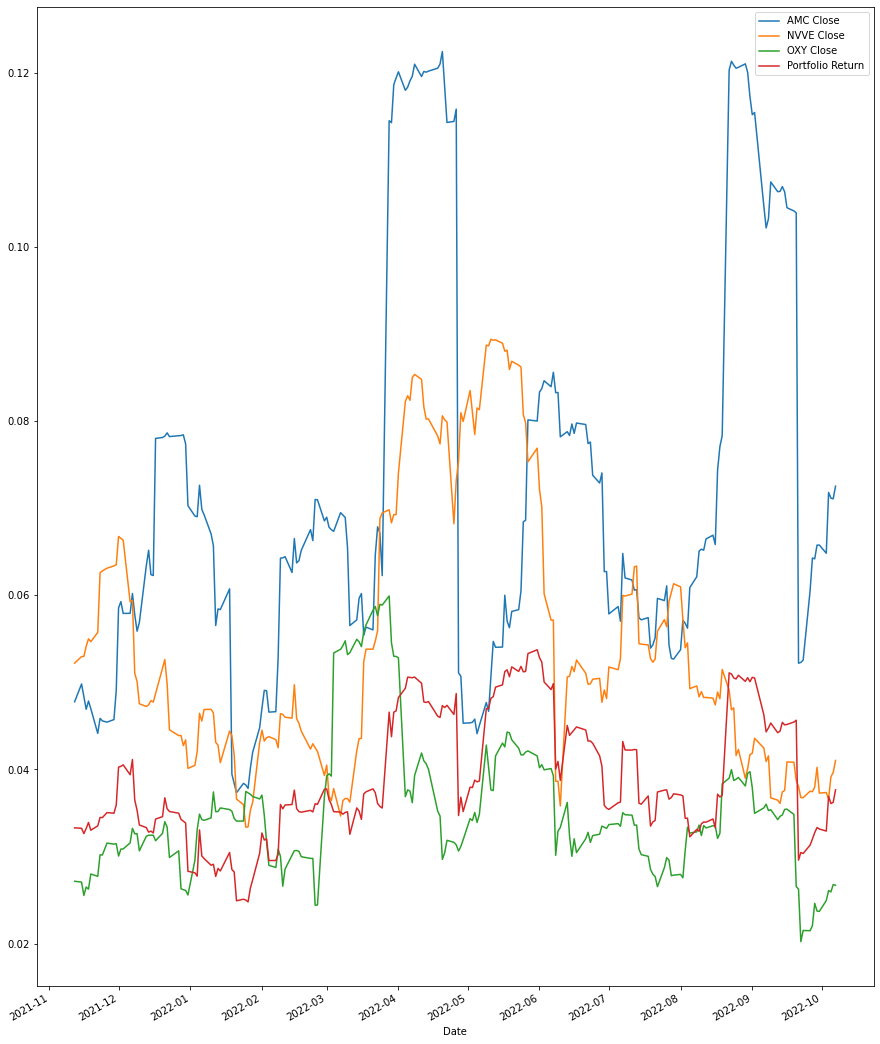

In [43]:
# Calculate rolling standard deviation
roll_std = combine_daily_returns_dataframe.rolling(window=21).std()

# Plot rolling standard deviation
roll_std.plot(figsize = (15,20))


### Calculate and plot the correlation

<AxesSubplot:>

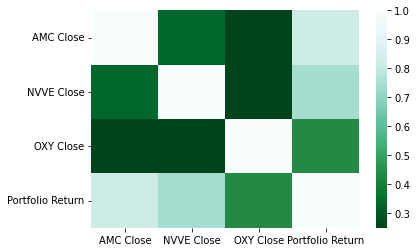

In [44]:
# Calculate and plot the correlation
correl = combine_daily_returns_dataframe.corr()

sns.heatmap(correl, vmin=0.25, vmax=1,cmap="BuGn_r")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta for Portfolio'}, xlabel='Date'>

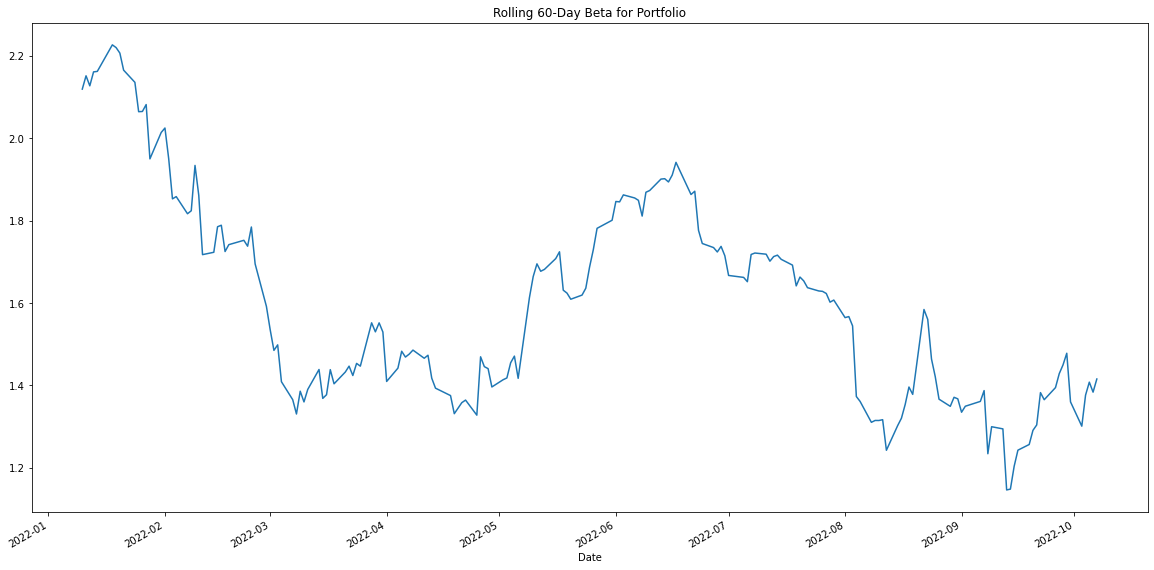

In [45]:
# Calculate and plot Beta

# Calculate the new sp500 returns and rename column
sp500_new_returns = sp500_new_dataframe.pct_change().dropna()
sp500_new_returns.rename(columns= {'SP500 Close':'SP500 Return'}, inplace = True)

# Calculate covariance of Portfolio Return vs. SP500
covariance = combine_daily_returns_dataframe['Portfolio Return'].rolling(window=60).cov(sp500_new_returns['SP500 Return'])

# Calculate variance of the S&P 500
variance = sp500_new_returns['SP500 Return'].rolling(window=60).var()

# Calculate portfolio beta
port_beta = covariance / variance

# Plot 60 Day Beta 
port_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta for Portfolio')

<AxesSubplot:xlabel='Date'>

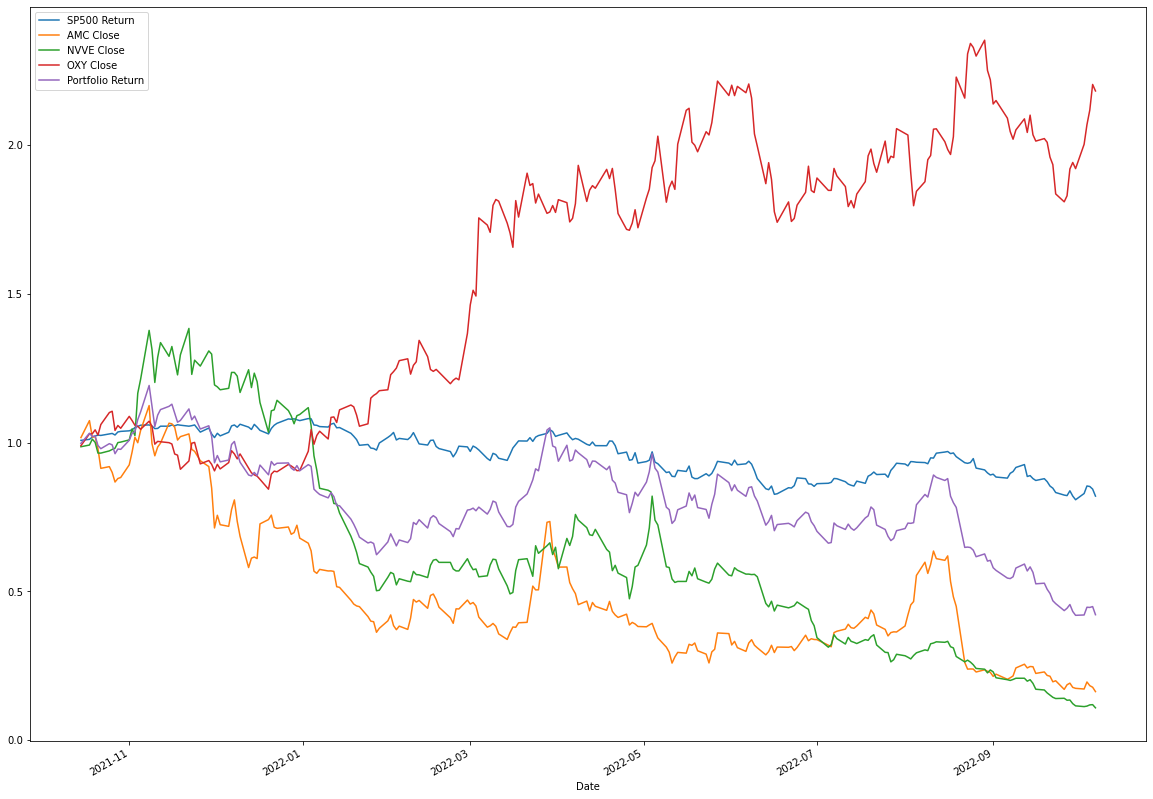

In [46]:
#cumculative returns

new_df = pd.concat([sp500_new_returns,combine_daily_returns_dataframe], axis='columns', join='inner')
cumulative_por_return = (1+new_df).cumprod()

cumulative_por_return.plot(figsize=(20,15))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios

sharpe_ratio = (combine_daily_returns_dataframe.mean() * 252) / (combine_daily_returns_dataframe.std() * np.sqrt(252))
sharpe_ratio


AMC Close          -0.976532
NVVE Close         -2.105872
OXY Close           1.693509
Portfolio Return   -1.108730
dtype: float64

<AxesSubplot:>

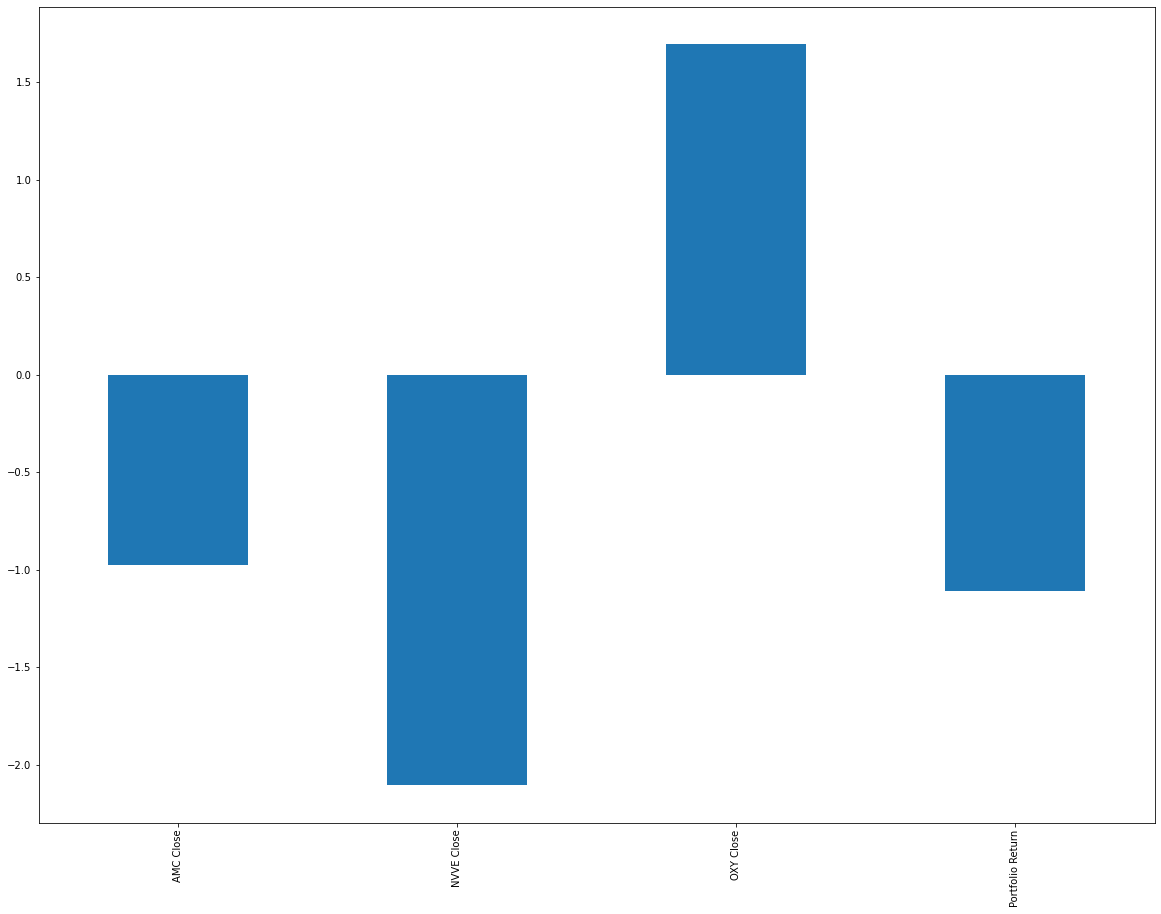

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize= (20,15))

### How does your portfolio do?

My Portfolio is on the riskier side and more volatile compared to SP500. Both AMC and NVVE are riskier than OXY. My portfolio underperformed the SP500. 